<a href="https://colab.research.google.com/github/akanbiabiodun25/Hamoye-166a464ba141f000/blob/main/HAMOYE_SVM_GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/HR_Analytics.csv.csv')

In [140]:
df = pd.read_csv('/content/drive/MyDrive/HR_Analytics.csv.csv')

In [141]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [143]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [144]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [145]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [146]:
np.asarray(df)

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [147]:
#No of attrited employees
attrited_employees=df[df['Attrition']=='Yes']

num_attrited_employees=len(attrited_employees)

print(num_attrited_employees)

237


In [148]:
#No of employee in the data set
num_employees = len(df)

print(num_employees)

1470


In [149]:
#Turnover rate of attrited employees
turnover_rate = num_attrited_employees/num_employees
print(turnover_rate)

0.16122448979591836


In [150]:
turnover = turnover_rate*100

print(turnover)

16.122448979591837


In [151]:
# Let's see all unique categorical values at a glance
import numpy as np
print("Attrition : ",np.unique(df['Attrition']))
print('BusinessTravel: ',np.unique(df['BusinessTravel']))
print('Department : ',np.unique(df['Department']))
print('EducationField: ',np.unique(df['EducationField']))
print('Gender : ',np.unique(df['Gender']))
print('JobRole : ',np.unique(df['JobRole']))
print('MaritalStatus : ',np.unique(df['MaritalStatus']))
print('Over18 : ',np.unique(df['Over18']))
print('OverTime : ',np.unique(df['OverTime']))

Attrition :  ['No' 'Yes']
BusinessTravel:  ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
Department :  ['Human Resources' 'Research & Development' 'Sales']
EducationField:  ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
Gender :  ['Female' 'Male']
JobRole :  ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
MaritalStatus :  ['Divorced' 'Married' 'Single']
Over18 :  ['Y']
OverTime :  ['No' 'Yes']


In [152]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [153]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    1470
dtype: int64
1470


In [154]:
# Analysing some other numerical values
print('StandardHours : ',np.unique(df['StandardHours']))
print('EmployeeCount : ',np.unique(df['EmployeeCount']))
print('EmployeeNumber: ',np.unique(df['EmployeeNumber']))


StandardHours :  [80]
EmployeeCount :  [1]
EmployeeNumber:  [   1    2    4 ... 2064 2065 2068]


In [155]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df['BusinessTravel']= df['BusinessTravel'].map({'Non-Travel':0, 'Travel_Frequently':2, 'Travel_Rarely':1})
df['Department'] = df['Department'].map({'Human Resources':0, 'Research & Development':1, 'Sales':2})
df['EducationField']= df['EducationField'].map({'Human Resources':5, 'Life Sciences':1, 'Marketing':2,
'Medical':3,'Other':0, 'Technical Degree':4})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})
df['JobRole'] = df['JobRole'].map({'Healthcare Representative':0, 'Human Resources':1,
'Laboratory Technician':2,'Manager':3,
'Manufacturing Director':4,
'Research Director':5, 'Research Scientist':6, 'Sales Executive':7,
'Sales Representative':8})
df['MaritalStatus'] = df['MaritalStatus'].map({'Divorced':0, 'Married':2, 'Single':1})
df['OverTime'] = df['OverTime'].map({'No':0, 'Yes':1})

In [156]:
df=df.drop(['StandardHours','EmployeeCount','EmployeeNumber','Over18'],axis=1
)


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

In [161]:
print('Data columns with null values:\n',
df.isnull().sum())

Data columns with null values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [162]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,0,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [163]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,0,2,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,2,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8
1469,34,0,1,628,1,8,3,3,2,1,...,3,1,0,6,3,4,4,3,1,2


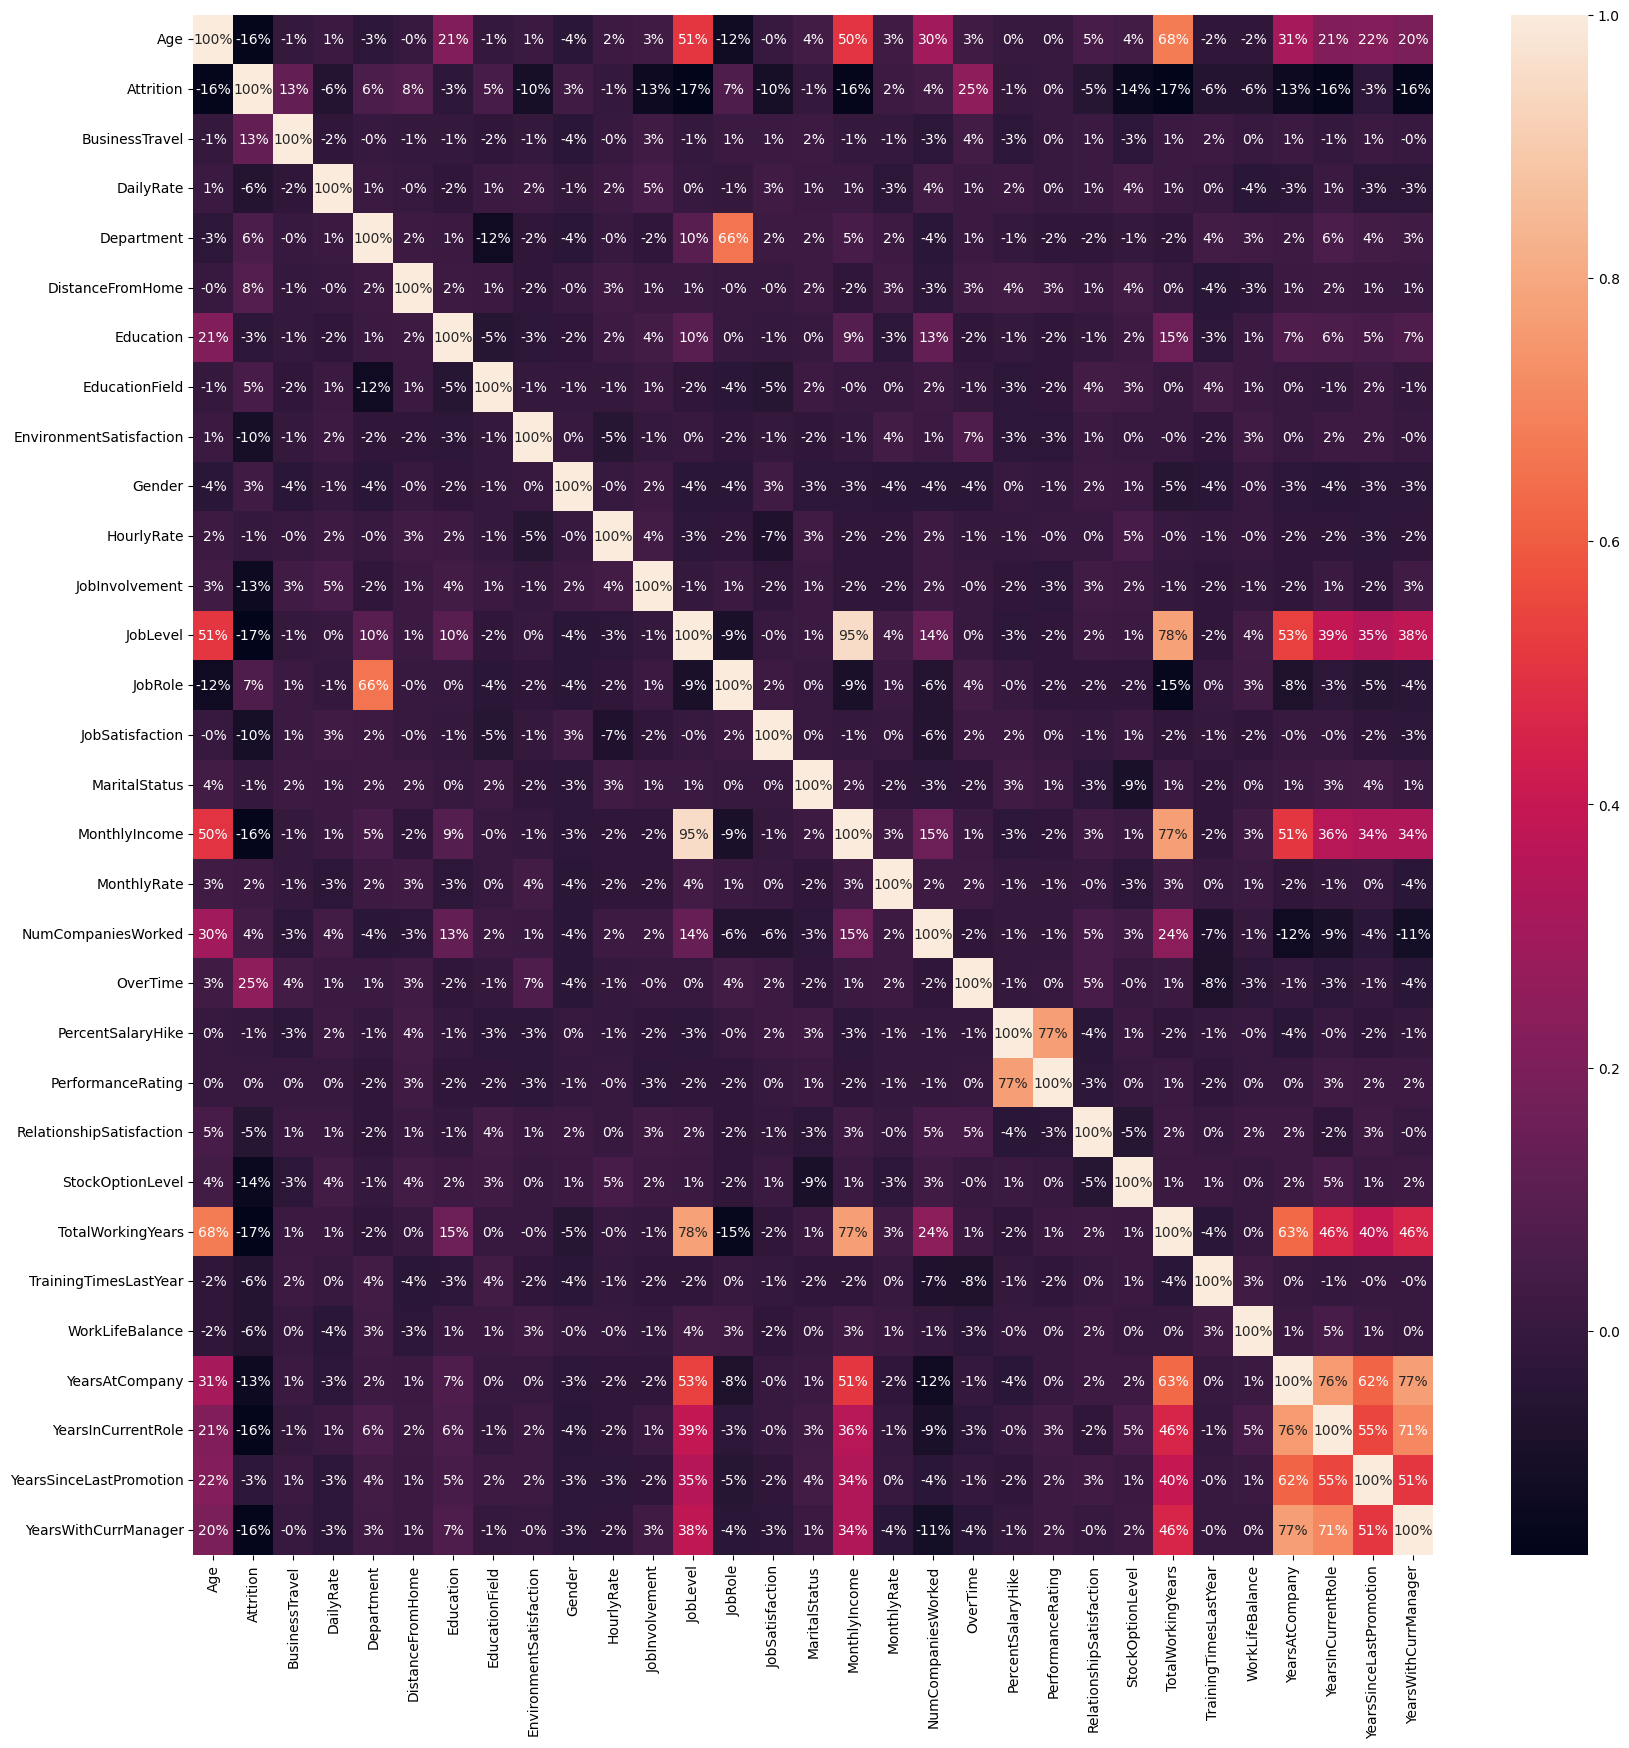

In [164]:
correlation=round(df.corr(),2)
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True, fmt='.0%')
plt.show()

In [165]:
# With following function we can select highly correlated features
# It will remove the first features that is correlated with any other feature
def correlation_set(dataset,threshold):
    col_corr=set() # Tos store set of all the name of correlayed features
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[j,i]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [166]:
# Calling the function to drop features who are highlt correlated above 0.6
corr_feature=correlation_set(X,0.6)

In [167]:
corr_feature

set()

In [168]:
# DROPPING HIGHLY CORRELATED FEATURES
X=X.drop(corr_feature,axis=1)


In [169]:
# uSING CHI SQUARE
# Apply Select kbest algorithm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_features=SelectKBest(score_func=chi2,k=15)
ordered_features.fit(X,y)

SelectKBest(k=15, score_func=<function chi2 at 0x7f8130e1e0e0>)

In [170]:
ordered_features.scores_


array([8.41552768e+01, 6.17712866e+00, 9.56580494e+02, 1.32929732e+00,
       6.37721416e+01, 5.20642224e-01, 2.34140137e+00, 6.89059434e+00,
       5.10086544e-01, 4.31779090e-01, 4.60561607e+00, 2.49392423e+01,
       7.01194663e+00, 9.31816631e-02, 1.19663355e+03, 6.43865444e+00,
       6.38450667e+01, 2.35026858e-01, 1.33233286e+00, 2.52688260e+01,
       3.08579616e+00, 1.08554296e+00])

In [171]:
X.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance'],
      dtype='object')

In [172]:
selected_feature=pd.DataFrame(ordered_features.scores_,columns=['Score'])
selected_feature_score=pd.DataFrame(X.columns)
selected_feature_score=pd.concat([selected_feature_score,selected_feature],axis=1)
selected_feature_score.columns=['Features','Score']
selected_feature_score.sort_values("Score",ascending=False)[:20]

,Features,Score
14,MonthlyRate,1196.633553
2,DailyRate,956.580494
0,Age,84.155277
16,OverTime,63.845067
4,DistanceFromHome,63.772142
19,StockOptionLevel,25.268826
11,JobLevel,24.939242
12,JobSatisfaction,7.011947
7,EnvironmentSatisfaction,6.890594
15,NumCompaniesWorked,6.438654


In [173]:
# dROPING SIMILAR FEATURES
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [175]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [176]:
sum(var_thres.get_support())

22

In [177]:
constant_columns = [column for column in X.columns
if column not in X.columns[var_thres.get_support()]]


In [178]:
print(len(constant_columns))
print((constant_columns))

0
[]


   Attrition
0       1233
1        237


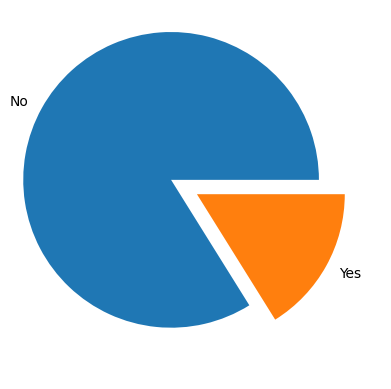

In [179]:
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
plt.pie(attrition_count['Attrition'] , labels = ['No' , 'Yes'] , explode = (0.2,0))
print(attrition_count)

In [180]:
feature = ['Age','Attrition','Department','EducationField','JobInvolvement','JobLevel',
'JobRole','MonthlyIncome',
'StockOptionLevel','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
'TotalWorkingYears',
'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

<ipython-input-181-de068583c620>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9,2,p+1)


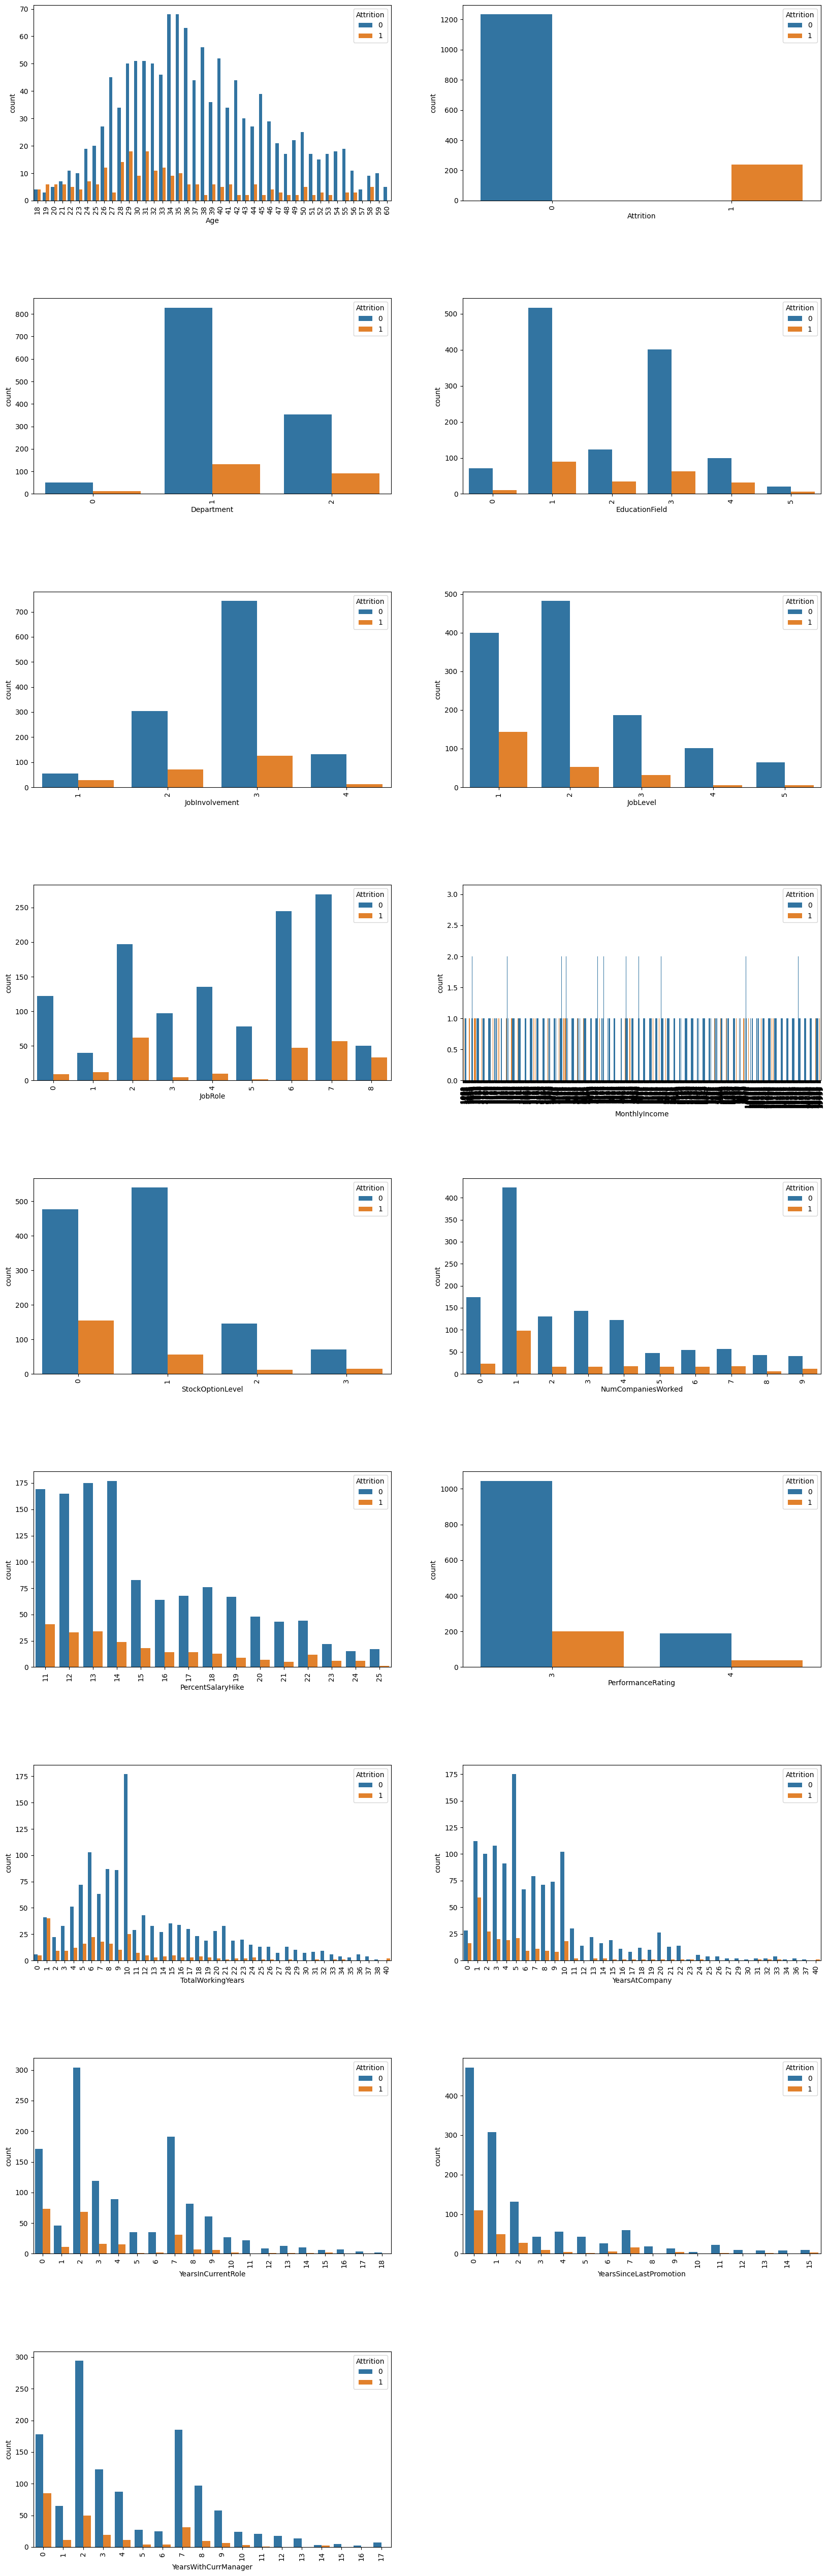

In [181]:
fig = plt.subplots(figsize=(20,65))
for p, q in enumerate(feature):
    plt.subplot(9,2,p+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=q,data=df, hue='Attrition')
    plt.xticks(rotation=90)

In [182]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,0,4,1,...,3,2,0,7,3,3,0,0,0,0


In [183]:
X = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,1,2,1,0,7,1
1,2,1,1,1,6,2
2,1,1,0,1,2,1
3,2,1,1,0,6,2
4,1,1,3,1,2,2
...,...,...,...,...,...,...
1465,2,1,3,1,2,2
1466,1,1,3,1,0,2
1467,1,1,1,1,4,2
1468,2,2,3,1,7,2


In [184]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

In [185]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()


In [186]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1466,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1467,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1468,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [187]:
# note that we dropped the target 'Atrittion'
X_numerical = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement']]

In [188]:
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement
0,41,1102,1,2,2,94,3
1,49,279,8,1,3,61,2
2,37,1373,2,2,4,92,2
3,33,1392,3,4,4,56,3
4,27,591,2,1,1,40,3
...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4
1466,39,613,6,1,4,42,2
1467,27,155,4,3,2,87,4
1468,49,1023,2,3,4,63,2


In [190]:
X_all = pd.concat([X, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,41,1102,1,2,2,94,3
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,49,279,8,1,3,61,2
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,37,1373,2,2,4,92,2
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,33,1392,3,4,4,56,3
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,27,591,2,1,1,40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,36,884,23,2,3,41,4
1466,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,39,613,6,1,4,42,2
1467,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,27,155,4,3,2,87,4
1468,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,49,1023,2,3,4,63,2


In [191]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str)

# convert feature names to string data type
X = scaler.fit_transform(X_all)

In [192]:
X


array([[1.        , 0.        , 0.        , ..., 0.33333333, 0.91428571,
        0.66666667],
       [1.        , 0.        , 1.        , ..., 0.66666667, 0.44285714,
        0.33333333],
       [1.        , 0.        , 0.        , ..., 1.        , 0.88571429,
        0.33333333],
       ...,
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.81428571,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.47142857,
        0.33333333],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.74285714,
        1.        ]])

In [193]:
y = df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [195]:
X_train.shape

(1102, 59)

In [196]:
X_test.shape

(368, 59)

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [198]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 84.78260869565217 %


<Axes: >

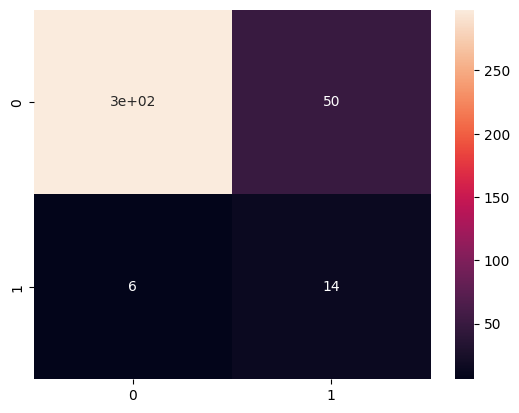

In [199]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       304
           1       0.70      0.22      0.33        64

    accuracy                           0.85       368
   macro avg       0.78      0.60      0.62       368
weighted avg       0.83      0.85      0.81       368



In [201]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [202]:
y_pred = model.predict(X_test)

<Axes: >

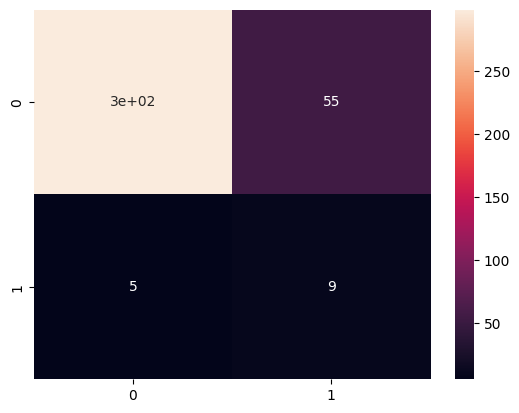

In [203]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [204]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       304
           1       0.64      0.14      0.23        64

    accuracy                           0.84       368
   macro avg       0.74      0.56      0.57       368
weighted avg       0.81      0.84      0.79       368



In [205]:
import tensorflow as tf

In [206]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [207]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               25500     
                                                                 
 dense_5 (Dense)             (None, 500)               250500    
                                                                 
 dense_6 (Dense)             (None, 500)               250500    
                                                                 
 dense_7 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Check for correlation between variables
corr = df.corr()
print(corr)

                               Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205       -0.011807   0.010661   
Attrition                -0.159205   1.000000        0.127006  -0.056652   
BusinessTravel           -0.011807   0.127006        1.000000  -0.015539   
DailyRate                 0.010661  -0.056652       -0.015539   1.000000   
Department               -0.031882   0.063991       -0.002640   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.009696  -0.004985   
Education                 0.208034  -0.031373       -0.008670  -0.016806   
EducationField           -0.006013   0.046783       -0.022501   0.013151   
EnvironmentSatisfaction   0.010146  -0.103369       -0.011310   0.018355   
Gender                   -0.036311   0.029453       -0.044896  -0.011716   
HourlyRate                0.024287  -0.006846       -0.004164   0.023381   
JobInvolvement            0.029820  -0.130016        0.029300   0.046135   
JobLevel    

In [209]:
# Check for variables with low variance
variance = df.var()
print(variance)

Age                         8.345505e+01
Attrition                   1.353232e-01
BusinessTravel              2.832048e-01
DailyRate                   1.628196e+05
Department                  2.785647e-01
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EducationField              1.475810e+00
EnvironmentSatisfaction     1.194829e+00
Gender                      2.401634e-01
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobRole                     6.060564e+00
JobSatisfaction             1.216270e+00
MaritalStatus               6.252965e-01
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
OverTime                    2.030462e-01
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StockOptionLevel            7.260346e-01
TotalWorkingYear

In [210]:
# Check for correlation between variables
corr = df.corr()
print(corr)

                               Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205       -0.011807   0.010661   
Attrition                -0.159205   1.000000        0.127006  -0.056652   
BusinessTravel           -0.011807   0.127006        1.000000  -0.015539   
DailyRate                 0.010661  -0.056652       -0.015539   1.000000   
Department               -0.031882   0.063991       -0.002640   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.009696  -0.004985   
Education                 0.208034  -0.031373       -0.008670  -0.016806   
EducationField           -0.006013   0.046783       -0.022501   0.013151   
EnvironmentSatisfaction   0.010146  -0.103369       -0.011310   0.018355   
Gender                   -0.036311   0.029453       -0.044896  -0.011716   
HourlyRate                0.024287  -0.006846       -0.004164   0.023381   
JobInvolvement            0.029820  -0.130016        0.029300   0.046135   
JobLevel    

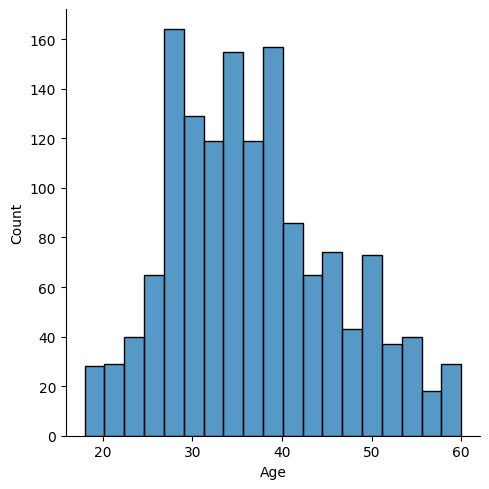

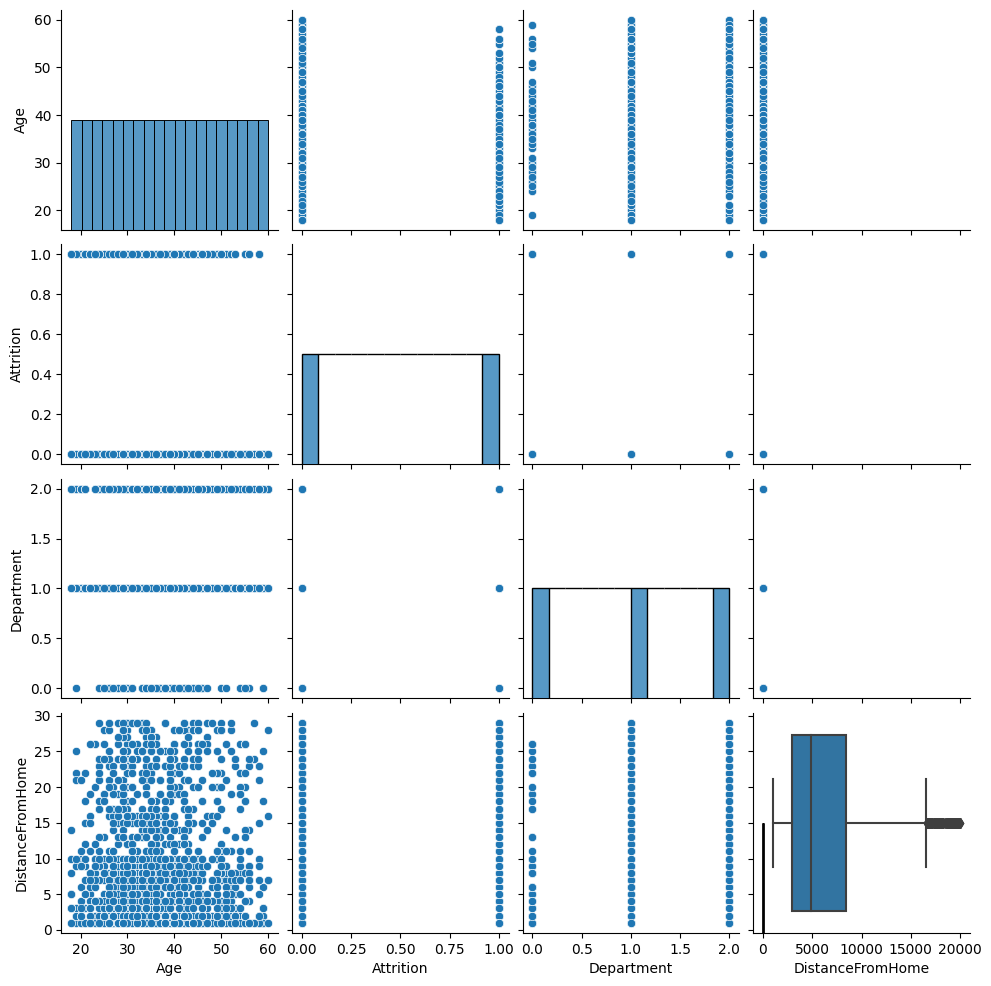

In [211]:
# Check the distribution of variables
sns.displot(df['Age'])

# Check for relationships between variables
sns.pairplot(df[['Age', 'Attrition', 'Department', 'DistanceFromHome']])

# Check for outliers
sns.boxplot(x=df['MonthlyIncome'])

plt.show()


In [212]:
# Split the dataset into features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

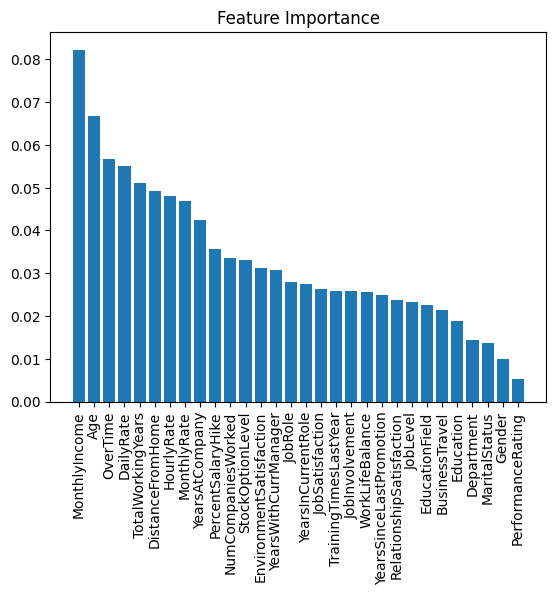

In [213]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the data
rfc.fit(X, y)

# Get feature importances
importances = rfc.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()